In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<IPython.core.display.Javascript object>

Saved to /content/drive/MyDrive/real_time_face_mask/with_mask/photo_10.jpg


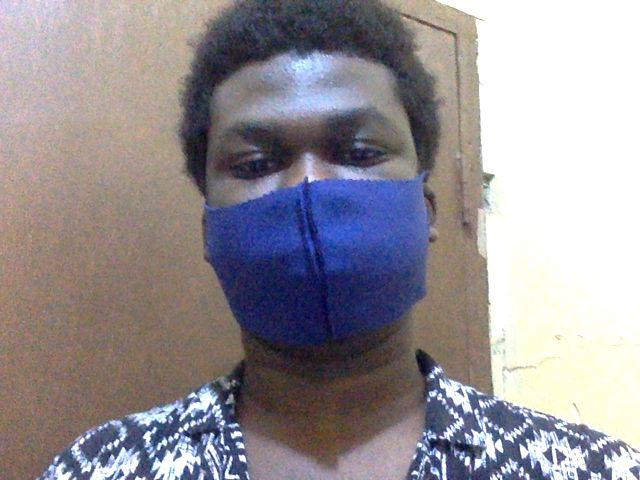

<IPython.core.display.Javascript object>

Saved to /content/drive/MyDrive/real_time_face_mask/with_mask/photo_11.jpg


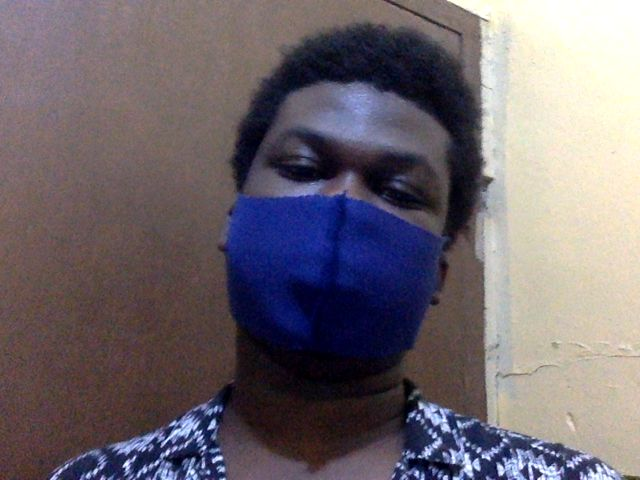

<IPython.core.display.Javascript object>

Saved to /content/drive/MyDrive/real_time_face_mask/with_mask/photo_12.jpg


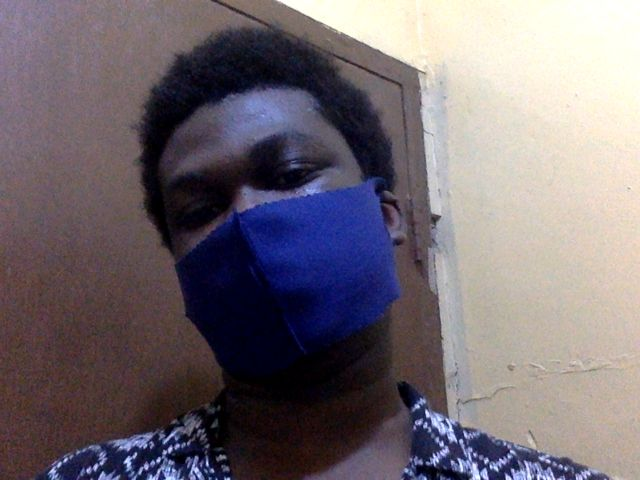

<IPython.core.display.Javascript object>

Saved to /content/drive/MyDrive/real_time_face_mask/with_mask/photo_13.jpg


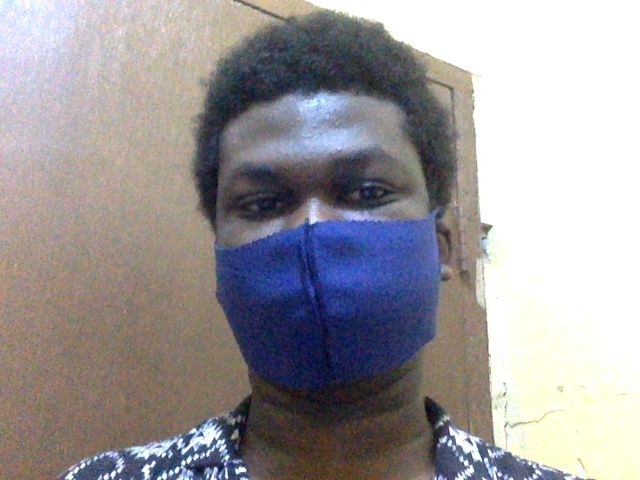

<IPython.core.display.Javascript object>

Saved to /content/drive/MyDrive/real_time_face_mask/with_mask/photo_14.jpg


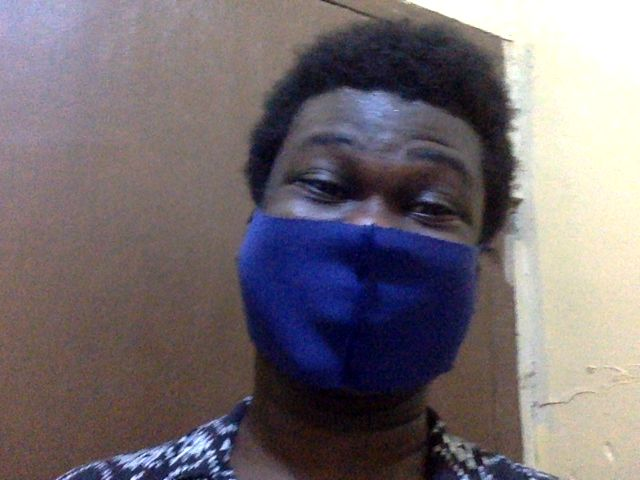

<IPython.core.display.Javascript object>

Saved to /content/drive/MyDrive/real_time_face_mask/with_mask/photo_15.jpg


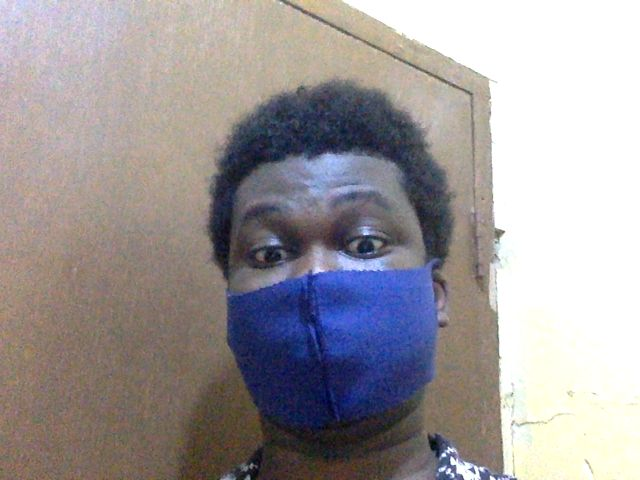

<IPython.core.display.Javascript object>

Saved to /content/drive/MyDrive/real_time_face_mask/with_mask/photo_16.jpg


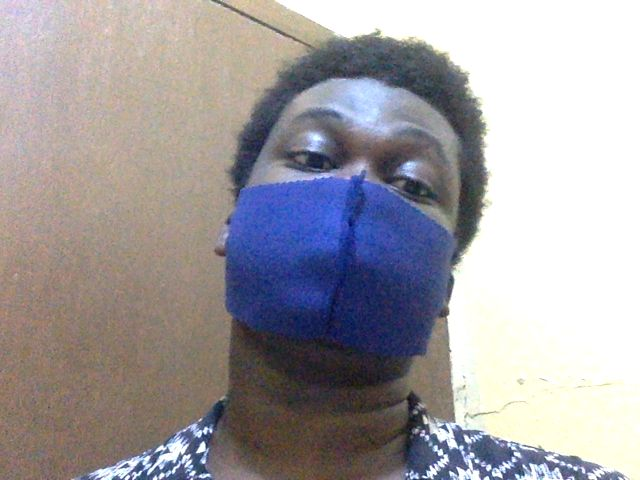

<IPython.core.display.Javascript object>

Saved to /content/drive/MyDrive/real_time_face_mask/with_mask/photo_17.jpg


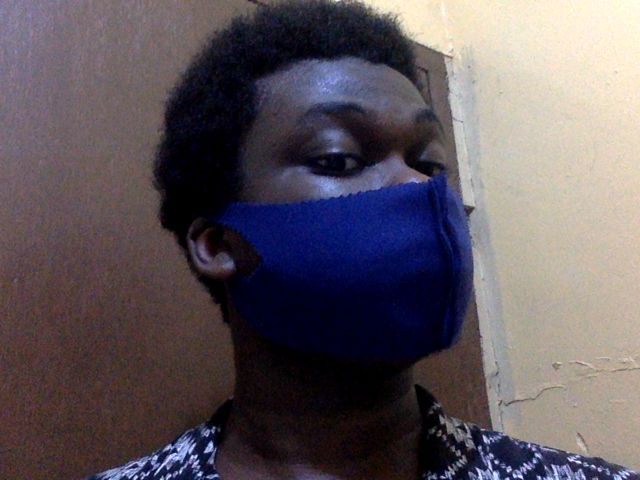

<IPython.core.display.Javascript object>

Saved to /content/drive/MyDrive/real_time_face_mask/with_mask/photo_18.jpg


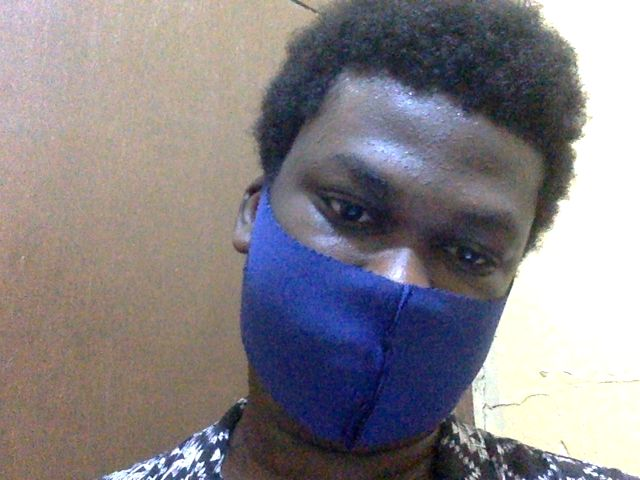

<IPython.core.display.Javascript object>

Saved to /content/drive/MyDrive/real_time_face_mask/with_mask/photo_19.jpg


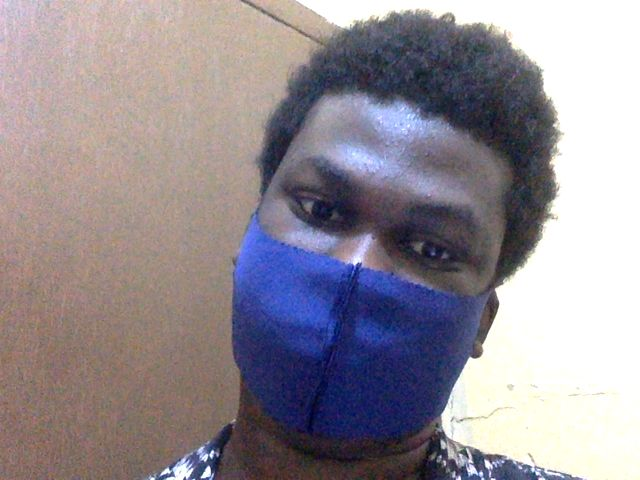

In [ ]:
from IPython.display import Image
for i in range(10,20):
  try:
    name='/content/drive/MyDrive/real_time_face_mask/with_mask/photo_'+str(i)+'.jpg'
    filename = take_photo(filename=name)
    print('Saved to {}'.format(filename))

    # Show the image which was just taken.
    display(Image(filename))
  except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))